# Segment audios

In [1]:
import os

# Data Management
import pandas as pd

import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Audio
from pydub import AudioSegment

In [2]:
!ls ../../../../

bin   etc   lib    libx32      mnt   root  snap  tmp  wslAcfiAP  wslnDADBP
boot  home  lib32  lost+found  opt   run   srv	 usr  wslfIEHnO  wsloJgNAP
dev   init  lib64  media       proc  sbin  sys	 var  wslfPmJoO


In [3]:
import pandas as pd

# Load CSV predictions.csv
df = pd.read_csv('../../../../../mnt/e/Deep Learning Analysis/NOWOPAM_DAY_Downsampled_Model23/predictions_no_background.csv')
df

,Path,Filename,StartSecond,EndSecond,MainClassification,ConfidenceScore,ConfidenceVector
0,NOWOPAM DAY_Downsampled/channelA_2024-06-04_01...,channelA_2024-06-04_01-48-06_48kHz.wav,63,66,KillerWhale,0.568359,"[0.41651639342308044, 0.0005951551138423383, 0..."
1,NOWOPAM DAY_Downsampled/channelA_2024-06-04_03...,channelA_2024-06-04_03-59-12_48kHz.wav,39,42,KillerWhale,0.566447,"[0.28282231092453003, 0.003969627898186445, 0...."
2,NOWOPAM DAY_Downsampled/channelA_2024-06-04_04...,channelA_2024-06-04_04-14-12_48kHz.wav,45,48,KillerWhale,0.510340,"[0.316283255815506, 0.017617404460906982, 0.03..."
3,NOWOPAM DAY_Downsampled/channelA_2024-06-04_04...,channelA_2024-06-04_04-31-03_48kHz.wav,129,132,KillerWhale,0.525480,"[0.2816283106803894, 0.0487314835190773, 0.027..."
4,NOWOPAM DAY_Downsampled/channelA_2024-06-04_05...,channelA_2024-06-04_05-31-36_48kHz.wav,42,45,KillerWhale,0.640998,"[0.2124193012714386, 0.04027629271149635, 0.01..."
...,...,...,...,...,...,...,...
233,NOWOPAM DAY_Downsampled/channelA_2024-06-06_23...,channelA_2024-06-06_23-21-22_48kHz.wav,6,9,KillerWhale,0.563988,"[0.10524842143058777, 0.023314744234085083, 0...."
234,NOWOPAM DAY_Downsampled/channelA_2024-06-06_23...,channelA_2024-06-06_23-21-22_48kHz.wav,90,93,KillerWhale,0.348022,"[0.3025113046169281, 0.03195066377520561, 0.09..."
235,NOWOPAM DAY_Downsampled/channelA_2024-06-06_23...,channelA_2024-06-06_23-21-22_48kHz.wav,255,258,KillerWhale,0.490302,"[0.27642950415611267, 0.011335188522934914, 0...."
236,NOWOPAM DAY_Downsampled/channelA_2024-06-06_23...,channelA_2024-06-06_23-31-22_48kHz.wav,69,72,KillerWhale,0.670108,"[0.1172894835472107, 0.00324572273530066, 0.01..."


In [4]:
species = df["MainClassification"].unique()
species

array(['KillerWhale', 'CommonDolphin', 'BottlenoseDolphin',
       'StripedDolphin', 'Long_FinnedPilotWhale',
       "Grampus_Risso'sDolphin"], dtype=object)

In [6]:
# HARD_DRIVE = "f"
# OS = "WSL"

# import subprocess
# from NO_SHARABLE import PASSWORD

# if OS == "WSL":
#     command = f'mount -t drvfs F: /mnt/{HARD_DRIVE}'

#     try:
#         # Ejecutar el comando como sudo
#         proc = subprocess.Popen(
#             ['sudo', '-S'] + command.split(),
#             stdin=subprocess.PIPE,
#             stdout=subprocess.PIPE,
#             stderr=subprocess.PIPE,
#             universal_newlines=True
#         )

#         # Enviar la contraseña seguido de un salto de línea
#         stdout, stderr = proc.communicate(PASSWORD + '\n')

#         print('STDOUT:', stdout)
#         print('STDERR:', stderr)

#         if proc.returncode == 0:
#             print("Hard drive mounted successfully")
#             HARD_DRIVE = HARD_DRIVE
#         else:
#             print("Failed to mount hard drive")

#     except Exception as e:
#         print(f"An error occurred: {e}")

In [5]:
import os

In [6]:
for specie in species:
    # Load the subset
    subset = df[df["MainClassification"] == specie]
    subset = subset.reset_index(drop=True)
    print(len(subset))

152
10
8
43
20
5


In [7]:
import os
from pydub import AudioSegment
import pandas as pd

In [8]:
# Load CSV predictions.csv
df = pd.read_csv('../../../../../mnt/e/Deep Learning Analysis/NOWOPAM_DAY_Downsampled_Model23/predictions_no_background.csv')

species = df["MainClassification"].unique()

# take for each MainClassification the 100 samples with the highest confidence
df = df.sort_values(by=["ConfidenceScore"], ascending=False).groupby("MainClassification").head(100)

# count of rows per MainClassification
df["MainClassification"].value_counts()

MainClassification
KillerWhale               100
StripedDolphin             43
Long_FinnedPilotWhale      20
CommonDolphin              10
BottlenoseDolphin           8
Grampus_Risso'sDolphin      5
Name: count, dtype: int64

In [10]:
CLASSES_MAPPING = {
    'Background': 0,
    'BottlenoseDolphin': 1,
    'CommonDolphin': 2,
    "Grampus_Risso'sDolphin": 3,
    'HarborPorpoise': 4,
    'KillerWhale': 5,
    'Long_FinnedPilotWhale': 6,
    'StripedDolphin': 7
}

# Reverse mapping for easy lookup
IDX_TO_CLASSES = {v: k for k, v in CLASSES_MAPPING.items()}

In [11]:
def analyze_confidence_vectors(df, ignore_background=False, confidence_threshold=0.5):
    results = []

    for _, row in df.iterrows():
        confidence_vector = eval(row['ConfidenceVector'])  # Convert string to list
        main_class_idx = np.argmax(confidence_vector)
        main_class_score = confidence_vector[main_class_idx]

        # Sort classes by confidence
        sorted_classes = sorted(
            enumerate(confidence_vector), key=lambda x: x[1], reverse=True
        )

        # Filter background if necessary
        if ignore_background:
            sorted_classes = [sc for sc in sorted_classes if sc[0] != CLASSES_MAPPING['Background']]

        # Filter by confidence threshold
        sorted_classes = [sc for sc in sorted_classes if sc[1] >= confidence_threshold]

        # Create a summary for this row
        summary = {
            'Filename': row['Filename'],
            'StartSecond': row['StartSecond'],
            'EndSecond': row['EndSecond'],
            'MainClassification': IDX_TO_CLASSES[main_class_idx],
            'MainConfidenceScore': main_class_score,
            'TopClasses': [
                {
                    'Class': IDX_TO_CLASSES[class_idx],
                    'Score': score
                }
                for class_idx, score in sorted_classes[:5]  # Top 5 classifications
            ]
        }
        results.append(summary)

    return results

# Analyze with and without background, using a confidence threshold of 0.5
results_with_background = analyze_confidence_vectors(df, ignore_background=False, confidence_threshold=0.3)
results_without_background = analyze_confidence_vectors(df, ignore_background=True, confidence_threshold=0.3)

Plotting results with background:


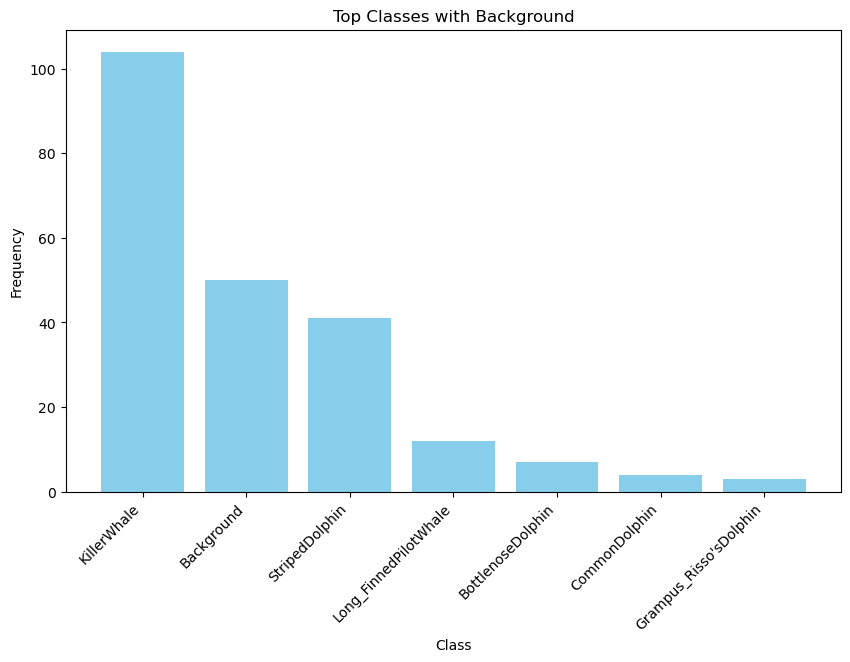


Plotting results without background:


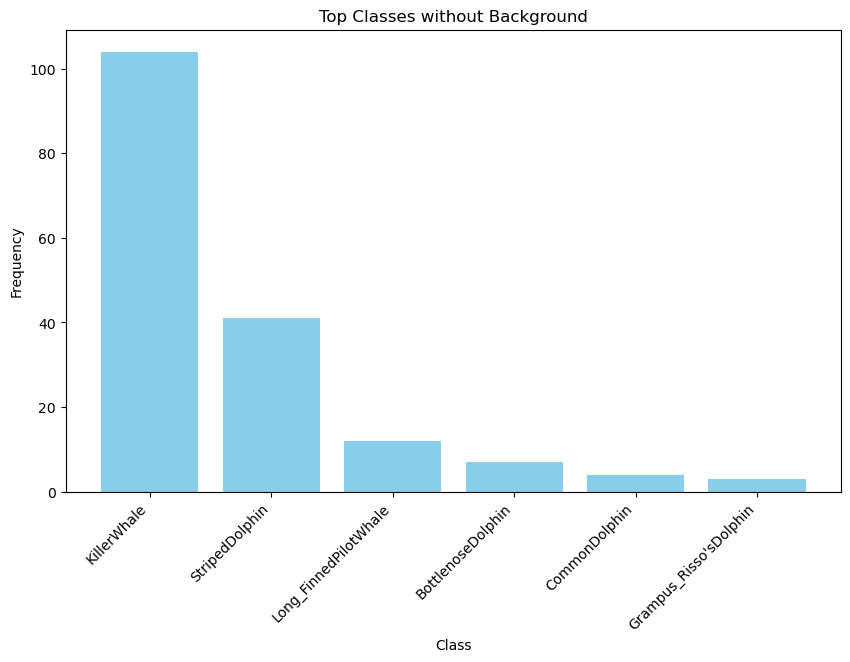

In [ ]:
# Visualization function
def plot_top_classes(results, title):
    class_counts = {}

    for result in results:
        for entry in result['TopClasses']:
            class_name = entry['Class']
            class_counts[class_name] = class_counts.get(class_name, 0) + 1

    # Sort by frequency
    sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
    classes, counts = zip(*sorted_counts)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

print("\nPlotting results without background:")
plot_top_classes(results_without_background, "Top Classes without Background")

In [14]:
df["BackgroundConfidenceScore"] = df["ConfidenceVector"].apply(lambda x: eval(x)[0])

In [16]:
df["ConfidenceSpecieBackground"] = df["ConfidenceScore"] - df["BackgroundConfidenceScore"]

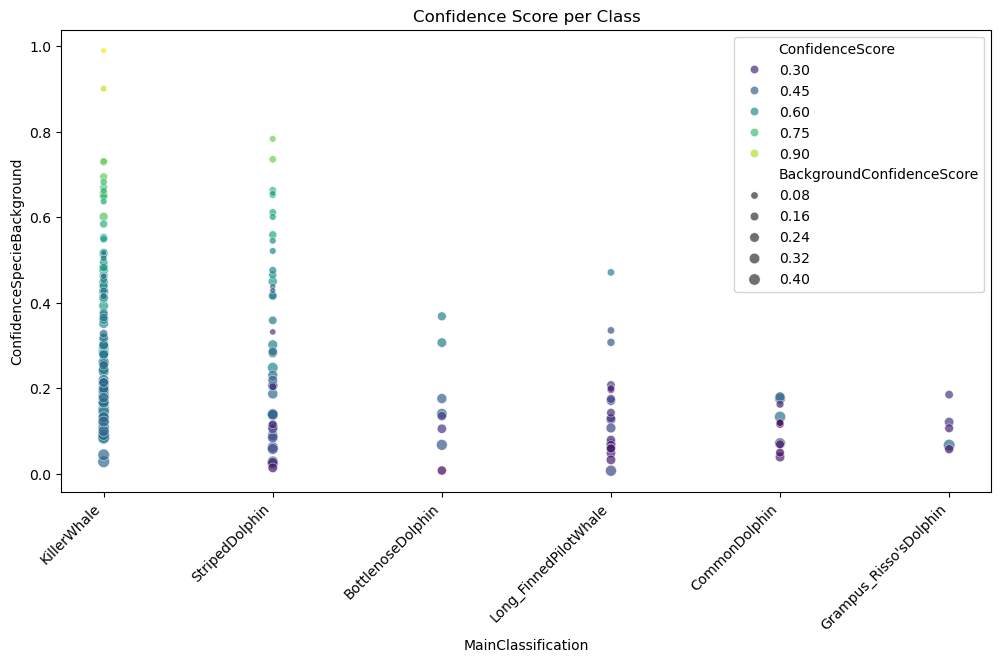

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='MainClassification', y='ConfidenceSpecieBackground', hue='ConfidenceScore', size='BackgroundConfidenceScore', palette='viridis', alpha=0.7)
plt.title('Confidence Score per Class')
plt.xticks(rotation=45, ha='right')
plt.show()


In [9]:
def cut_audio(prediction, output_folder, audios_folder="../Audios/"):
    file = prediction["Path"]

    start_time = max(0, int(prediction["StartSecond"] * 1000) - 2000)  # Convert to ms
    end_time = min(1200000, int(prediction["EndSecond"] * 1000) + 2000)

    start_time = int(start_time)
    end_time = int(end_time)

    scientific_name = prediction["MainClassification"]
    confidence = prediction["ConfidenceScore"]
    # round to 2 decimals
    confidence = round(confidence, 2)

    # Get the output folder
    output_folder_specie = os.path.join(output_folder, scientific_name)
    os.makedirs(output_folder_specie, exist_ok=True)

    # Get the output file path
    base_filename = os.path.basename(file)
    output_file = os.path.join(
        output_folder_specie, f"{base_filename.replace('.wav', '')}_{start_time // 1000}_{end_time // 1000}_{confidence}.WAV"
    )

    if not os.path.exists(output_file):
        # Get the audio file
        audio_file = os.path.join(audios_folder, file)

        if not os.path.exists(audio_file):
            print(f"Warning: {audio_file} not found!")
            return

        # Load the audio file
        audio = AudioSegment.from_wav(audio_file)

        # Cut the audio segment
        cut_audio = audio[start_time:end_time]

        print(f"Exporting {output_file}...")

        # Export the cut audio segment
        cut_audio.export(output_file, format="wav")
    else:
        print(f"File {output_file} already exists")


AudioFolder = "/mnt/e/Segments_DL23/"

for specie in species:
    # Load the subset
    subset = df[df["MainClassification"] == specie]
    # reset index
    subset = subset.reset_index(drop=True)
    # For each subset saved in a csv, save in a different folder
    output_folder = f"{AudioFolder}/"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Cut the audio for each row in the subset
    for index, row in subset.iterrows():
        cut_audio(row, output_folder, audios_folder = f"/mnt/e/")

Exporting /mnt/e/Segments_DL23//KillerWhale/channelA_2024-06-04_11-31-12_48kHz_181_188_0.99.WAV...
Exporting /mnt/e/Segments_DL23//KillerWhale/channelA_2024-06-04_11-31-12_48kHz_166_173_0.92.WAV...
Exporting /mnt/e/Segments_DL23//KillerWhale/channelA_2024-06-05_10-12-42_48kHz_178_185_0.83.WAV...
Exporting /mnt/e/Segments_DL23//KillerWhale/channelA_2024-06-05_08-06-36_48kHz_79_86_0.81.WAV...
Exporting /mnt/e/Segments_DL23//KillerWhale/channelA_2024-06-05_10-05-51_48kHz_217_224_0.81.WAV...
Exporting /mnt/e/Segments_DL23//KillerWhale/channelA_2024-06-06_23-14-31_48kHz_7_14_0.81.WAV...
Exporting /mnt/e/Segments_DL23//KillerWhale/channelA_2024-06-05_15-11-45_48kHz_145_152_0.8.WAV...
Exporting /mnt/e/Segments_DL23//KillerWhale/channelA_2024-06-06_08-52-23_48kHz_58_65_0.78.WAV...
Exporting /mnt/e/Segments_DL23//KillerWhale/channelA_2024-06-04_08-36-24_48kHz_175_182_0.78.WAV...
Exporting /mnt/e/Segments_DL23//KillerWhale/channelA_2024-06-05_13-34-21_48kHz_172_179_0.75.WAV...
Exporting /mnt/e/S